# Aprendizaje Automático y Big Data
## Práctica 1 : Regresión Lineal

Mario Quiñones Pérez y Guillermo García Patiño Lenza



### PARTE 1

In [160]:
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

def carga_csv(file_name):
    valores = read_csv(file_name, header=None).to_numpy()
    return valores.astype(float)

In [161]:
def coste(X, Y, T):
    m = len(X)
    estimacion = T[0] + T[1]*X
    error = estimacion - Y
    i = sum(error**2)
    coste = (1/(2*m))*i
    return coste

In [162]:
def calculoJ(datos, a):
    X = datos[:,0]
    Y = datos[:,-1]
    t0 = 0
    t1 = 0
    m = len(X)
    for i in range(1500):
        s0 = s1 = 0
        for i in range(m):
            s0 = s0 + (t0 + t1*X[i] - Y[i])
            s1 = s1 + (t0 + t1*X[i] - Y[i])*X[i]
        t0 = t0 - s0*a/m
        t1 = t1 - s1*a/m
    return (t0, t1)

In [163]:
def main1():
    datos = carga_csv("ex1data1.csv")
    params = calculoJ(datos, 0.01)
    X = datos[:,0]
    Y = datos[:,-1]
    # dibujar grafica
    plt.plot(X, Y, "x")
    min_x = min(X)
    max_x = max(X)
    min_y = params[0] + params[1] * min_x
    max_y = params[0] + params[1] * max_x
    plt.plot([min_x, max_x], [min_y, max_y])
    plt.savefig("resultado.pdf")

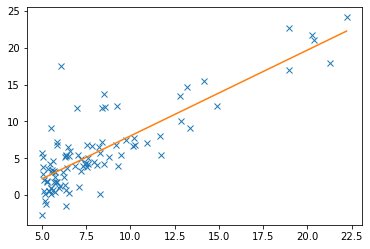

In [164]:
main1()

## Apartado 1.1

In [165]:
def make_data(t0_range, t1_range, X, Y) :        
    step = 0.1
    Theta0 = np.arange(t0_range[0], t0_range[1], step)
    Theta1 = np.arange(t1_range[0], t1_range[1], step)
    Theta0, Theta1 = np.meshgrid(Theta0, Theta1)
    Coste = np.empty_like(Theta0)
    for ix , iy in np.ndindex(Theta0.shape):
        Coste[ix,iy] = coste(X, Y, [Theta0[ix,iy], Theta1[ix, iy]])
    return [Theta0, Theta1, Coste]

In [166]:
def draw(r):
    plt.contour(r[0], r[1], r[2], np.logspace(-2, 3, 20))
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(r[0], r[1], r[2], cmap=cm.rainbow, linewidth=0,antialiased=False)
    tmp_planes = ax.zaxis._PLANES 
    ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                         tmp_planes[0], tmp_planes[1], 
                         tmp_planes[4], tmp_planes[5])
    ax.view_init(elev=30, azim=220)
    plt.show()

In [167]:
def main11():
    datos = carga_csv("ex1data1.csv")
    X = datos[:,0]
    Y = datos[:,1]
    r = make_data([-10, 10], [-1, 4], X, Y)
    draw(r)

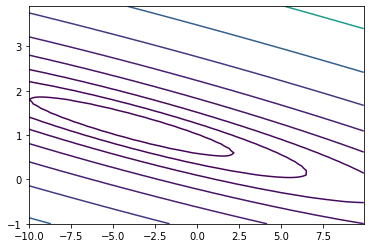

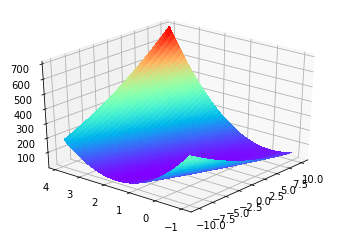

In [168]:
main11()




### PARTE 2

### Vectorizacion del gradiente

In [169]:
def normaliza(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X-mu)/sigma
    return(X_norm, mu, sigma)

In [321]:
def coste_2(X, Y, T):
    H = (np.dot(X,T) - Y)**2
    Sum = H.sum()
    m = len(X)
    coste = Sum/(2*m)
    return coste

In [406]:
def descenso_gradiente(X, Y, alpha):
    m = np.shape(X)[1]
    n = np.shape(X)[1]
    T = np.zeros([m,1])
    c = np.empty((1500,))
    p = np.empty((1500,))
    for i in range(1500):
        gradiente(X, Y, T, alpha)
        c[i] = coste_2(X, Y, T)
        p[i] = i
    plt.plot(p,c, "-")  
    plt.show()
    return T

In [385]:
def gradiente(X, Y, T, alpha):
    TAux = T
    m = np.shape(X)[0]
    n = np.shape(T)[0]
    H = np.dot(X, T)
    np.reshape(Y,(47,1))
    Dif = (np.transpose(H) - Y)
    for j in range(n):
        Dif_j = np.dot(Dif , X[:, j])
        TAux[j] = TAux[j] - (alpha / m) * Dif_j.sum()
    return TAux

In [424]:
def calculo(datos, alpha):
    X = datos[:,:-1]
    X_norm, mu, sigma = normaliza(X)
    Y = datos[:,-1]
    m = np.shape(X)[0]
    X_norm = np.hstack([np.ones([m,1]), X_norm])
    Thetas = descenso_gradiente(X_norm, Y, alpha)
    return Thetas

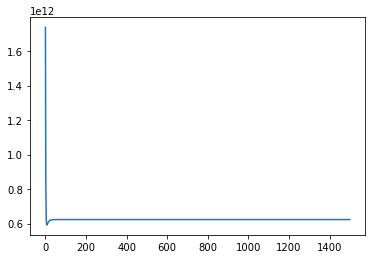

array([[340412.65957447],
       [109447.79646964],
       [ -6578.35485416]])

In [425]:
datos = carga_csv("ex1data2.csv")
calculoJ(datos, 0.3)

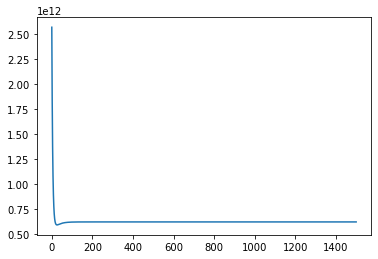

array([[340412.65957447],
       [109447.79646964],
       [ -6578.35485416]])

In [426]:
datos = carga_csv("ex1data2.csv")
calculoJ(datos, 0.1)

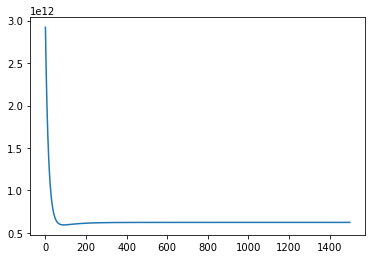

array([[340412.65957447],
       [109447.79634183],
       [ -6578.35472634]])

In [427]:
datos = carga_csv("ex1data2.csv")
calculoJ(datos, 0.03)

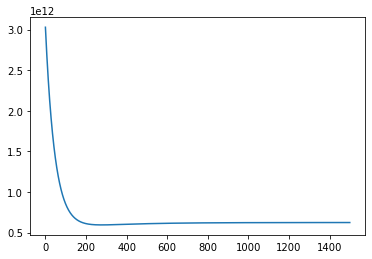

array([[340412.56301439],
       [109370.05670466],
       [ -6500.61509507]])

In [428]:
datos = carga_csv("ex1data2.csv")
calculoJ(datos, 0.01)

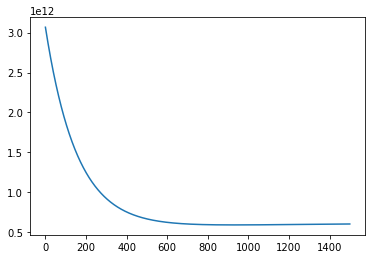

array([[336656.50747404],
       [101404.39797306],
       [  1374.58561585]])

In [429]:
datos = carga_csv("ex1data2.csv")
calculoJ(datos, 0.003)

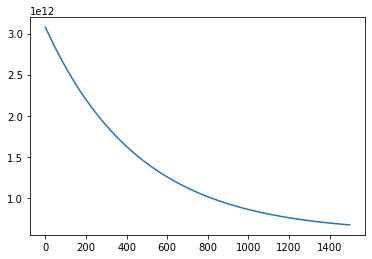

array([[264513.31219629],
       [ 74523.70638344],
       [ 18454.16604565]])

In [430]:
datos = carga_csv("ex1data2.csv")
calculoJ(datos, 0.001)

### Ecuacion Normal

In [176]:
def calculoJ2(datos):
    X = datos[:,:-1]
    Y = datos[:,-1]
    X_1=np.dot(np.transpose(X),X)
    X_2 = np.linalg.inv(X_1)
    X_3 = np.dot(X_2,np.transpose(X))
    T = np.dot(X_3, Y)
    return T
    
    

datos = carga_csv("ex1data2.csv")
X = datos[:,:-1]
Y = datos[:,-1]
print(calculoJ2(datos))
coste_2(X, Y, calculoJ2(datos))

[  140.86108621 16978.19105903]


2256975710.2496433

In [435]:
def pruba_ejemplo(cuadrados , habitaciones):
    datos = carga_csv("ex1data2.csv")
    T_Vector = calculoJ(datos, 0.003)
    T_Normal = calculoJ2(datos)
    X = datos[:,:-1]
    X_norm, mu, sigma = normaliza(X)
    print(sigma[0])
    (cuadrados - mu[0])/sigma[0]
    S_V = T_Vector[0] + (T_Vector[1]*(cuadrados - mu[0])/sigma[0]) + (T_Vector[2]*(habitaciones-mu[1])/sigma[1])
    S_N = T_Normal[0]*cuadrados + T_Normal[1]*habitaciones
    print("Para el calculo vectorizado sale:" , S_V)
    print("Para el calculo con la ecuacion normal sale:" , S_N)
    print("La diferencia entre ambos es:" , S_V - S_N)

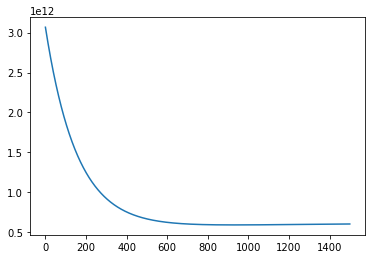

786.2026187430467
Para el calculo vectorizado sale: [291114.91365702]
Para el calculo con la ecuacion normal sale: 283355.3654250505
La diferencia entre ambos es: [7759.54823197]


In [436]:
pruba_ejemplo(1650 , 3)